# Assignment 2: Exploring Tree-Based Regression Methods for 2D Linear Data
## DTSC 680: Applied Machine Learning

## Name: Nash Lawrence

## Directions and Overview

The main purpose of this assignment is for you to gain experience using tree-based methods to solve simple regression problems.  In this assignment, you will fit a `Gradient-Boosted Regression Tree`, a `Random Forest`, and a `Decision Tree` to a noisy 2D linear data set.  Since these models can be trained very quickly on the supplied data, I want you to first manually adjust hyperparameter values and observe their influence on the model's predictions.  That is, you should manually sweep the hyperparameter space and try to hone in on the optimal hyperparameter values, again, _manually_.  (Yep, that means guess-and-check: pick some values, train the model, observe the prediction curve, repeat.)

But wait, there's more! Merely attempting to identify the optimal hyperparameter values is not enough.  Be sure to really get a visceral understanding of how altering a hyperparameter in turn alters the model predictions (i.e. the prediction curve).  This is how you will build your machine learning intuition!

So, play around and build some models.  When you are done playing with hyperparameter values, you should try to set these values to the optimal values manually (you're likely going to be _way_ off).  Then, retrain the model.  Next in this assignment, we will perform several grid searches, so you'll be able to compare your "optimal" hyperparameter values with those computed from the grid search.

We will visualize model predictions for the optimal `Gradient-Boosted Regression Tree`, a `Random Forest`, and `Decision Tree` models that were determined by the grid searches.  Next, you will compute the generalization error on the test set for the three models.

You will think critically about the different algorithms, as well as their prediction results, and characterize the trends you observe in the prediction results.  Can you explain in your own words how the algorithms work? How do the results predicted by these models compare and contrast?  Can you see any relationship between the algorithms and the model results?

Lastly, based on the arguments outlined in your critical analysis you must identify the model that best characterizes this data.  In other words, which of these models is going to generalize better? Consider all factors.

## Preliminaries

Let's import some common packages:

In [114]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_predictions(regressor, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = regressor.predict(x1.reshape(-1, 1)) 
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

In [115]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    
    # Check if regressors is a list
    if not isinstance(regressors, list):
        regressors = [regressors]

    # Iterate over each regressor in the list and plot predictions
    for regressor in regressors:
        y_pred = regressor.predict(x1.reshape(-1, 1)) 
        plt.plot(X[:, 0], y, data_style, label=data_label)
        plt.plot(x1, y_pred, style, linewidth=2, label=label)
    
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

# Import and Split Data

Complete the following:



1. Begin by importing the data from the file called `2DLinear.csv`.  Name the returned DataFrame `data`. 

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively.  Specify the `random_state` parameter to be `42` (do this throughout the entire note book).
3. Reshape some data, so that we don't run into trouble later.

In [116]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('2DLinear.csv')
X = data.drop('y', axis = 1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Reshape X Data and Make NumPy Arrays
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Plot Data

Simply plot your training data here in order to create the plot below.

Saving figure Raw2DLinearData


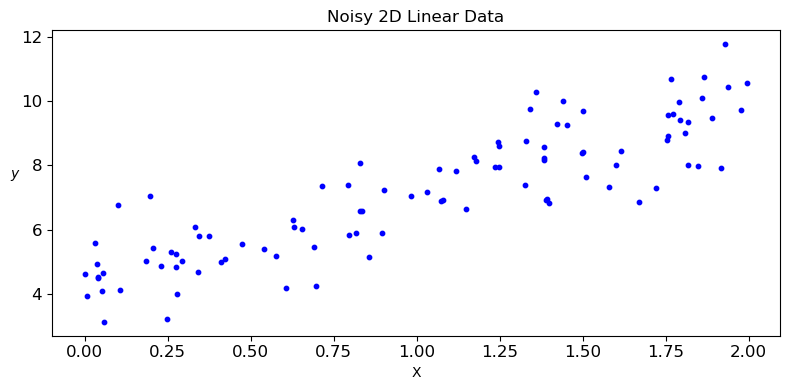

In [117]:
fix, axes = plt.subplots(ncols = 1, figsize =(8,4), sharey = True)
plt.scatter(X_train, y_train, c = "blue", s = 10)
plt.title("Noisy 2D Linear Data")
plt.xlabel("X")
plt.ylabel("$y$", rotation = 0)
save_fig("Raw2DLinearData")
plt.show()

# Explore 2D Linear Data: GradientBoostingRegressor

Fit a `GradientBoostingRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordnigly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `learning_rate = [0.1, 0.15, 0.2, 0.25]`
 - `max_depth = [2, 4, 6, 8]`
 - `n_estimators = [50, 100, 125, 200]`
 - `random_state = 42`

Initial "best values":
 - `learning_rate = 0.1`
 - `max_depth = 2`
 - `n_estimators = 100`
 - `random_state = 42`

In [118]:
from sklearn.ensemble import GradientBoostingRegressor

gBoost = GradientBoostingRegressor(max_depth = 2, n_estimators = 50, learning_rate = 0.1, random_state = 42)
gBoost.fit(X_train, y_train)
boostPred = gBoost.predict(X_test)

In [119]:
boostPred

array([5.03474044, 5.34258102, 8.26152883, 9.59770454, 5.34258102,
       9.40282115, 7.24107509, 5.34258102, 7.24107509, 5.03474044,
       4.29047785, 8.19064148, 5.18255846, 9.17315338, 5.34258102,
       5.28555718, 6.55412444, 7.24107509, 8.26152883, 5.18255846,
       5.34258102, 8.28011895, 6.55412444, 5.18255846, 6.55412444])

### Plot Model Predictions for Training Set

Saving figure gbrt_2DLinearReg


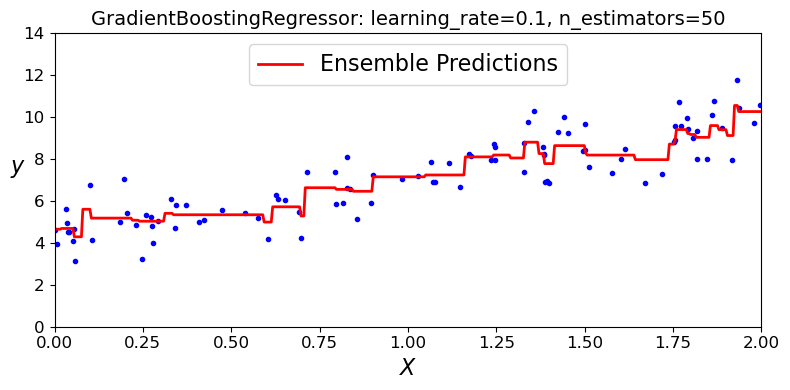

In [120]:
fix, axes = plt.subplots(ncols = 1, figsize =(8,4), sharey = True)
#plt.sca(axes[0])
plot_predictions([gBoost], X_train, y_train, axes = [0, 2.0, 0, 14], label = "Ensemble Predictions", style = "r-",
                 data_style = "b.", data_label = None)
plt.title("GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(gBoost.learning_rate, gBoost.n_estimators),
         fontsize = 14)
plt.xlabel("$X$", fontsize = 16)
plt.ylabel("$y$", fontsize = 16, rotation = 0)
save_fig("gbrt_2DLinearReg")
plt.show()

# Explore 2D Linear Data: RandomForestRegressor

Fit a `RandomForestRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordingly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `min_samples_split = <values>`
 - `max_depth = <values>`
 - `n_estimators = <values>`
 - `random_state = 42`

Initial "best values":
 - `min_samples_split = <value>`
 - `max_depth = <value>`
 - `n_estimators = <value>`
 - `random_state = 42`

In [121]:
from sklearn.ensemble import RandomForestRegressor

randFor = RandomForestRegressor(min_samples_split = 2, max_depth = 2, n_estimators = 100, random_state = 42)
randFor.fit(X_train, y_train)
rfPred = randFor.predict(X_test)

In [122]:
rfPred

array([5.06644266, 5.24492096, 8.17725788, 9.53501433, 5.24492096,
       9.57597372, 7.77278654, 5.24492096, 7.79302126, 5.07494454,
       4.85854692, 8.2956246 , 5.07266025, 9.24813998, 5.23393514,
       5.60177403, 6.66968747, 7.5467597 , 8.17725788, 5.02356874,
       5.2544266 , 8.2956246 , 6.66968747, 5.07266025, 6.66968747])

### Plot Model Predictions for Training Set

Saving figure rf_2DLinearReg


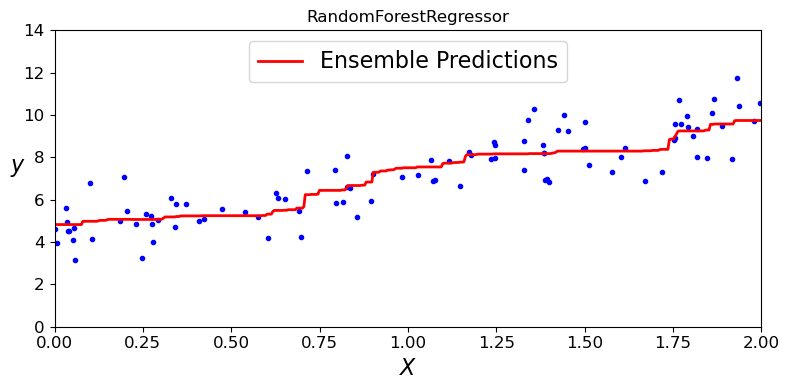

In [123]:
fix, axes = plt.subplots(ncols = 1, figsize =(8,4), sharey = True)
plot_predictions([randFor], X_train, y_train, axes = [0, 2, 0, 14], label = "Ensemble Predictions")
plt.title("RandomForestRegressor")
plt.xlabel("$X$", fontsize = 16)
plt.ylabel("$y$", fontsize = 16, rotation = 0)
save_fig("rf_2DLinearReg")
plt.show()

# Explore 2D Linear Data: DecisionTreeRegressor

Fit a `DecisionTreeRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordingly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `splitter = <values>`
 - `max_depth = <values>`
 - `min_samples_split = <values>`
 - `random_state = 42`

Initial "best values":
 - `splitter = <value>`
 - `max_depth = <value>`
 - `min_samples_split = <value>`
 - `random_state = 42`

In [124]:
from sklearn.tree import DecisionTreeRegressor

dTree = DecisionTreeRegressor(splitter = "random", max_depth = 2, min_samples_split = 2, random_state = 42)
dTree.fit(X_train, y_train)
dtPred = dTree.predict(X_test)

In [125]:
dtPred

array([ 4.79694091,  6.92704367,  6.92704367,  8.7647415 ,  6.92704367,
       10.09621839,  6.92704367,  6.92704367,  6.92704367,  6.92704367,
        4.79694091,  8.7647415 ,  4.79694091,  8.7647415 ,  6.92704367,
        6.92704367,  6.92704367,  6.92704367,  6.92704367,  4.79694091,
        6.92704367,  8.7647415 ,  6.92704367,  4.79694091,  6.92704367])

### Plot Model Predictions for Training Set

Saving figure dt_2DLinearReg


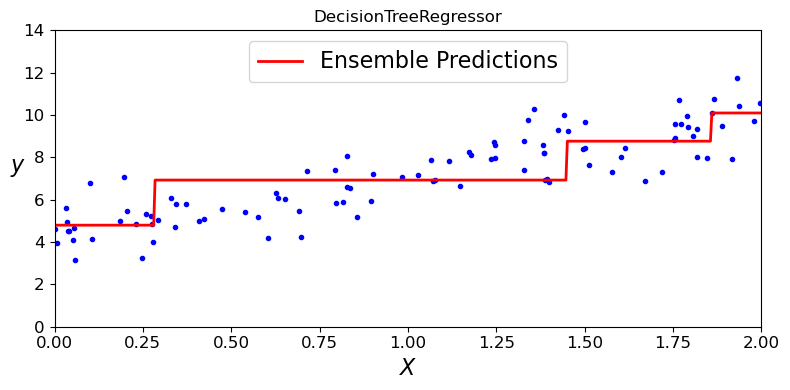

In [126]:
fix, axes = plt.subplots(ncols = 1, figsize =(8,4), sharey = True)
plot_predictions([dTree], X_train, y_train, axes = [0, 2, 0, 14], label = "Ensemble Predictions")
plt.title("DecisionTreeRegressor")
plt.xlabel("$X$", fontsize = 16)
plt.ylabel("$y$", fontsize = 16, rotation = 0)
save_fig("dt_2DLinearReg")
plt.show()

# Perform Grid Searches

You will perform a series of grid searches, which will yield the optimal hyperparamter values for each of the three model types.  You can compare the values computed by the grid search with the values you manually found earlier.  How do these compare?

You must perform a course-grained grid search, with a very broad range of values first.  Then, you perform a second grid search using a tighter range of values centered on those identified in the first grid search.  You may have to use another round of grid searching too (it took me at least three rounds of grid searches per model to ascertain the optimal hyperparameter values below).

Note the following:

1. Be sure to clearly report the optimal hyperparameters in the designated location after you calculate them!

2. You must use `random_state=42` everywhere that it is needed in this notebook.

3. You must use grid search to compute the following hyperparameters. Use the following hyperparameter values as the bounds of the ranges to be probed in your initial (course-grained) stint of grid searching. Note that these are NOT upper bounds for the further refined grid searches. If your initial search returns the upper bound of your values, you can (and should) search further above and below that value. You should examine these hyperparameters and their associated ranges, learn from this example, and use these values as a basis for your own future work when performing grid searches.  This is how you will build your machine learning intuition.  Keep in mind, these values also depend somewhat on this specific dataset!  (For example, it is important to notice that I decided to probe up to 1,000 for n_estimators.  10 would have been far too small.  1,000,000 would have been far too large.) 

   GradientBoostingRegressor:
    
     - `max_depth = up to 32`
     - `n_estimators = up to 1000`
     - `learning_rate = from .01 to 1`

   RandomForestRegressor:
    
     - `max_depth = up to 32`
     - `n_estimators = up to 1000`
     - `min_samples_split = up to 20`

   DecisionTreeRegressor:
    
     - `splitter = ["best", "random"]`
     - `max_depth = up to 32`
     - `min_samples_split = up to 20`  
     
     
4. `learning rate` should be rounded to two decimals.
5. The number of cross-folds. Specify `cv=3`


## Perform Individual Model Grid Searches

In this section you will perform a series of grid searches to compute the optimal hyperparameter values for each of the three model types.

In [78]:
from sklearn.model_selection import GridSearchCV
gBoostParam = {'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0], 'max_depth': [2, 4, 8, 16, 32], 'n_estimators': [50, 100, 125]}
gridSearchGB = GridSearchCV(gBoost, gBoostParam, verbose = 1, cv = 3)
gridSearchGB.fit(X_train, y_train)
print("The best parameters are: ", gridSearchGB.best_params_)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
The best parameters are:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}


In [82]:
gBoostParam = {'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2], 'max_depth': [1, 2, 3, 4, 5, 6],
               'n_estimators': [10, 25, 40, 50, 60, 75, 90, 95]}
gridSearchGB = GridSearchCV(gBoost, gBoostParam, verbose = 1, cv = 3)
gridSearchGB.fit(X_train, y_train)
print("The best parameters are: ", gridSearchGB.best_params_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
The best parameters are:  {'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 50}


In [83]:
gBoostParam = {'learning_rate': [0.1, 0.125, 0.15, 0.20, 0.25], 'max_depth': [1, 2, 3, 4],
               'n_estimators': [50, 55, 60, 65, 70, 75]}
gridSearchGB = GridSearchCV(gBoost, gBoostParam, verbose = 1, cv = 3)
gridSearchGB.fit(X_train, y_train)
print("The best parameters are: ", gridSearchGB.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
The best parameters are:  {'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 50}


On this dataset, the optimal model parameters for the `GradientBoostingRegressor` class are:

- `learning_rate = 0.15`
- `max_depth = 2`
- `n_estimators = 50`

In [85]:
rfParam = {'min_samples_split': [2, 4, 6, 8, 10], 'max_depth': [2, 4, 6, 8, 16, 32], 'n_estimators': [50, 75, 100, 125, 150]}
gridSearchRF = GridSearchCV(randFor, rfParam, verbose = 1, cv = 3)
gridSearchRF.fit(X_train, y_train)
print("The best parameters are: ", gridSearchRF.best_params_)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
The best parameters are:  {'max_depth': 6, 'min_samples_split': 6, 'n_estimators': 100}


In [86]:
rfParam = {'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth': [2, 3, 4, 5, 6, 7, 8],
          'n_estimators': [75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]}
gridSearchRF = GridSearchCV(randFor, rfParam, verbose = 1, cv = 3)
gridSearchRF.fit(X_train, y_train)
print("The best parameters are: ", gridSearchRF.best_params_)

Fitting 3 folds for each of 693 candidates, totalling 2079 fits
The best parameters are:  {'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 95}


In [87]:
rfParam = {'min_samples_split': [6, 8, 10, 12, 14, 16], 'max_depth': [2, 3, 4, 5],
           'n_estimators': [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}
gridSearchRF = GridSearchCV(randFor, rfParam, verbose = 1, cv = 3)
gridSearchRF.fit(X_train, y_train)
print("The best parameters are: ", gridSearchRF.best_params_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
The best parameters are:  {'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 92}


On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `max_depth = 5`
- `n_estimators = 92`
- `min_samples_split = 6`

In [88]:
dtParam = {'splitter': ["random"], 'max_depth': [2, 4, 6, 8, 16, 32], 'min_samples_split': [2, 4, 6, 8, 10]}
gridSearchDT = GridSearchCV(dTree, dtParam, verbose = 1, cv = 3)
gridSearchDT.fit(X_train, y_train)
print("The best parameters are: ", gridSearchDT.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
The best parameters are:  {'max_depth': 6, 'min_samples_split': 4, 'splitter': 'random'}


In [89]:
dtParam = {'splitter': ["random"], 'max_depth': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
gridSearchDT = GridSearchCV(dTree, dtParam, verbose = 1, cv = 3)
gridSearchDT.fit(X_train, y_train)
print("The best parameters are: ", gridSearchDT.best_params_)

Fitting 3 folds for each of 63 candidates, totalling 189 fits
The best parameters are:  {'max_depth': 6, 'min_samples_split': 4, 'splitter': 'random'}


On this dataset, the optimal model parameters for the `DecisionTreeRegressor` class are:

- `splitter = Random`
- `max_depth = 6`
- `min_samples_split = 4`

# Visualize Optimal Model Predictions

In the previous section you performed a series of grid searches designed to identify the optimal hyperparameter values for all three models.  Now, use the `best_params_` attribute of the grid search objects from above to create the three optimal models below.  For each model, visualize the models predictions on the training set - this is what we mean by the "prediction curve" of the model.  

### Create Optimal GradientBoostingRegressor Model

In [106]:
gBoostOpt = GradientBoostingRegressor(max_depth = 2, n_estimators = 50, learning_rate = 0.15, random_state = 42)
gBoostOpt.fit(X_train, y_train)
gBoostPred = gBoostOpt.predict(X_test)

### Plot Model Predictions for Training Set

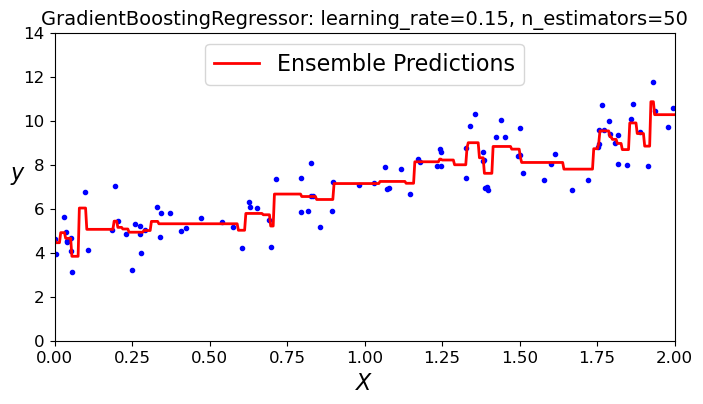

In [107]:
fix, axes = plt.subplots(ncols = 1, figsize =(8,4), sharey = True)
plot_predictions([gBoostOpt], X_train, y_train, axes = [0, 2.0, 0, 14], label = "Ensemble Predictions", style = "r-",
                 data_style = "b.", data_label = None)
plt.title("GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(gBoostOpt.learning_rate, gBoostOpt.n_estimators),
         fontsize = 14)
plt.xlabel("$X$", fontsize = 16)
plt.ylabel("$y$", fontsize = 16, rotation = 0)
plt.show()

### Create Optimal RandomForestRegressor Model

In [108]:
randForOpt = RandomForestRegressor(min_samples_split = 6, max_depth = 5, n_estimators = 92, random_state = 42)
randForOpt.fit(X_train, y_train)
randForPred = randForOpt.predict(X_test)

### Plot Model Predictions for Training Set

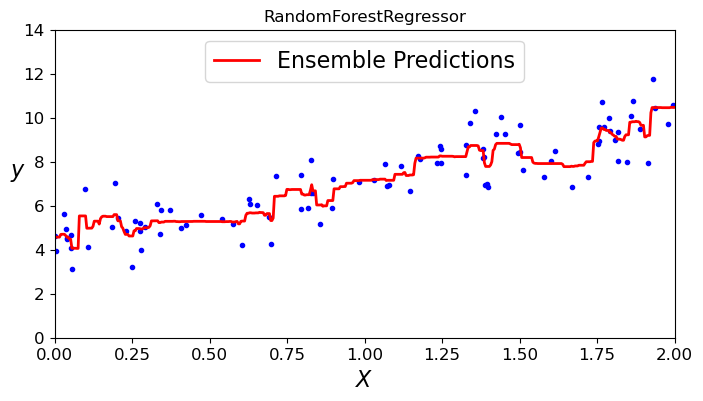

In [109]:
fix, axes = plt.subplots(ncols = 1, figsize =(8,4), sharey = True)
plot_predictions([randForOpt], X_train, y_train, axes = [0, 2, 0, 14], label = "Ensemble Predictions")
plt.title("RandomForestRegressor")
plt.xlabel("$X$", fontsize = 16)
plt.ylabel("$y$", fontsize = 16, rotation = 0)
plt.show()

### Create Optimal DecisionTreeRegressor Model

In [110]:
dTreeOpt = DecisionTreeRegressor(splitter = "random", max_depth = 6, min_samples_split = 4, random_state = 42)
dTreeOpt.fit(X_train, y_train)
dTreeOptPred = dTreeOpt.predict(X_test)

### Plot Model Predictions for Training Set

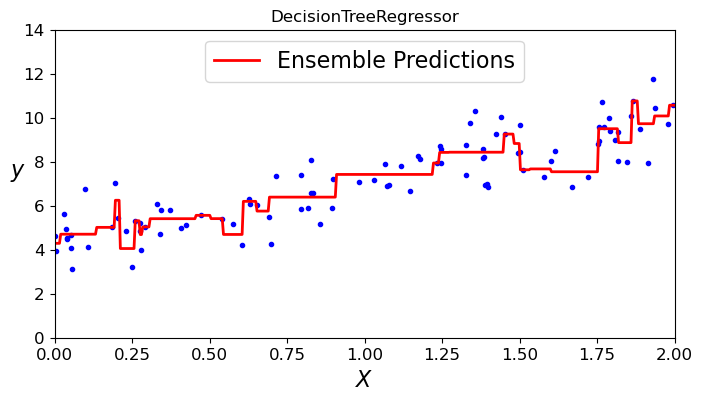

In [111]:
fix, axes = plt.subplots(ncols = 1, figsize =(8,4), sharey = True)
plot_predictions([dTreeOpt], X_train, y_train, axes = [0, 2, 0, 14], label = "Ensemble Predictions")
plt.title("DecisionTreeRegressor")
plt.xlabel("$X$", fontsize = 16)
plt.ylabel("$y$", fontsize = 16, rotation = 0)
plt.show()

# Compute Generalization Error

Compute the generalization error for each of the optimal models computed above.  Use MSE as the generalization error metric.  Round your answers to four decimal places.  Print the generalization error for all three models.

In [113]:
from sklearn.metrics import mean_squared_error

gbMSE = mean_squared_error(y_test, gBoostPred)
rfMSE = mean_squared_error(y_test, randForPred)
dtMSE = mean_squared_error(y_test, dTreeOptPred)

print("Generalization Error for GradientBoostingRegressor: {:.4f}".format(gbMSE))
print("Generalization Error for RandomForestRegressor: {:.4f}".format(rfMSE))
print("Generalization Error for DecisionTreeRegressor: {:.4f}".format(dtMSE))

Generalization Error for GradientBoostingRegressor: 1.3894
Generalization Error for RandomForestRegressor: 1.3175
Generalization Error for DecisionTreeRegressor: 1.3172


# Critical Analysis

Think critically about the different algorithms, as well as their prediction results, and characterize the trends you observe in the prediction results. Can you explain in your own words how the algorithms work? How do the results predicted by these models compare and contrast?  Can you see any relationship between the algorithms and the model results? Can you see any relationship between the prediction curves and the generalization error?

I am looking for **meaningful content** here.  Do not copy-and-paste model definitions off of the Internet.  You should think and write critically.


Gradient Boosting is a learning technique that builds trees sequentially, with each tree correcting the errors of the previous one. Random Forest is a technique that considers a random subset of features at each split and aggregates the results. Decision Tree splits data into regions based on features, then makes predictions based on majority class or the average target variable in each region. The DecisionTree and RandomForest models had similar MSE scores with Decision Tree having the best performance, Gradient Boosting had the highest MSE score. All three models perform well, and the differences in generalization errors are relatively small. RandomForestRegressor and DecisionTreeRegressor, being tree-based models, show comparable and improved performance in this updated scenario. GradientBoostingRegressor remains a strong performer, though with a slightly higher generalization error in this particular context. Looking at the prediction curves, I am a little surprised that Decision Tree has the best MSE score because its predictions on the visualization looked to fluctuate more than the Random Forest. 

# Final Model Selection and Justification

Based on the arguments outlined in your critical analysis, make one final model recommendation.  Which model best characterizes this data?  In other words, which of these models is going to generalize better? Consider all factors.  What is the type of the optimal model (i.e. `GradientBoostingRegressor`, `RandomForestRegressor`, or `DecisionTreeRegressor`)? What are the optimal model hyperparameters that should be used for training on this data set?    Succinctly summarize the justification for your choice based on your arguments made above in the critical analysis section.


Final Model Recommendation: Random Forest Regressor

I chose Random Forest as the most optimal model because of its low generalization error, its ability to handle different data patterns and be less sensitive to hyperparameter tuning, and its ability to combine the strengths of multiple decision trees which provide a good balance between variance and bias. After performing Grid Search for hyperparameter tuning, the optimal model hyperparameters used for training on this dataset would be: max_depth = 5, min_samples_split = 6, n_estimators = 92